In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="5";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from OPT_attack_sign_SGD_lf import OPT_attack_sign_SGD_lf
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10
import os
import numpy as np
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified
tensor([3])
tensor([8])
tensor([8])
tensor([0])
tensor([6])
tensor([6])
tensor([1])
tensor([6])
tensor([3])
tensor([1])
tensor([0])
tensor([9])
tensor([5])
tensor([7])
tensor([9])
tensor([8])
tensor([5])
tensor([7])


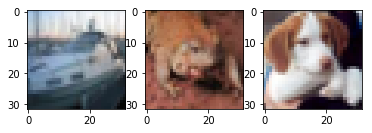

In [2]:
net = CIFAR10()
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
# print(net)
load_model(net,'cifar10_gpu.pt')
net.eval()
model = net.module if torch.cuda.is_available() else net
# model = model.cpu()
train_loader, test_loader, train_dataset, test_dataset = load_cifar10_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None
for i, (xi,yi) in enumerate(test_loader):
    print(yi)
    if i==2:
        X0, Y0 = xi, yi
    if i==5:
        X1, Y1 = xi, yi
    if i==16:
        X2, Y2 = xi, yi
    if i==17:
        break
amodel = PytorchModel(model, bounds=[0,1], num_classes=10)

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(X[0].numpy(), (1, 2, 0)))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(adv.cpu()[0].numpy(), (1, 2, 0)))
    plt.show()

# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(np.transpose(X0[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose(X1[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,3)
plt.imshow(np.transpose(X2[0].numpy(), (1, 2, 0)))
plt.show()

In [3]:
x, y = X0, Y0
target = 4
seed = 100

### Untargeted

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 1.0816
--------> Found distortion 0.7950
--------> Found distortion 0.5808
--------> Found distortion 0.3885
--------> Found distortion 0.2804
--------> Found distortion 0.1744
==========> Found best distortion 0.1744 in 0.6511 seconds using 290 queries
Iteration  10 distortion 0.098440 num_queries 1522
Iteration  20 distortion 0.075016 num_queries 2801
Iteration  30 distortion 0.065565 num_queries 4146
Iteration  40 distortion 0.052168 num_queries 5606
Iteration  50 distortion 0.045161 num_queries 6923
Iteration  60 distortion 0.040793 num_queries 8210
Iteration  70 distortion 0.039324 num_queries 9375
Iteration  80 distortion 0.035845 num_queries 10649
Iteration  90 distortion 0.032423 num_queries 11912
Iteration 100 distortion 0.030158 num_queries 13273
Iteration 110 distortion 0.029408 num_queries 14504
Iteration 120 distortion 0.028329 num_queries 15777
Iteration 130 distortion 0.027026 num_q

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Adversarial Example Found Successfully: distortion 0.0241 target 1 queries 42072 
Time: 83.8444 seconds


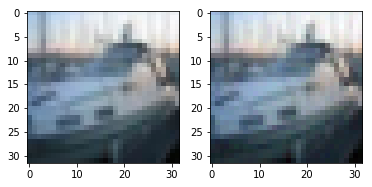

In [4]:
attack = OPT_attack_lf(amodel)
adv, dist = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 1.0816
--------> Found distortion 0.7950
--------> Found distortion 0.5808
--------> Found distortion 0.3885
--------> Found distortion 0.2804
--------> Found distortion 0.1744
==========> Found best distortion 0.1744 in 0.4130 seconds using 290 queries
Iteration   1 distortion 0.092218 num_queries 695
Iteration   6 distortion 0.027073 num_queries 2288
Iteration  11 distortion 0.025199 num_queries 3795
Iteration  16 distortion 0.023527 num_queries 5233
Iteration  21 distortion 0.021585 num_queries 6800
Iteration  26 distortion 0.020144 num_queries 7981
Iteration  31 distortion 0.019245 num_queries 9378
Iteration  36 distortion 0.018463 num_queries 10567
Iteration  41 distortion 0.017672 num_queries 11920
Iteration  46 distortion 0.017525 num_queries 13247
Iteration  51 distortion 0.016732 num_queries 14561
Iteration  56 distortion 0.016699 num_queries 15756
Iteration  61 distortion 0.016414 num_qu

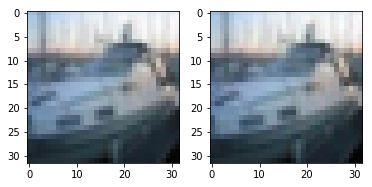

In [11]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 1.0816
--------> Found distortion 0.7950
--------> Found distortion 0.5808
--------> Found distortion 0.3885
--------> Found distortion 0.2804
--------> Found distortion 0.1744
==========> Found best distortion 0.1744 in 0.4045 seconds using 290 queries
Iteration   1 distortion 0.092653 num_queries 628
Iteration   6 distortion 0.027351 num_queries 2325
Iteration  11 distortion 0.021438 num_queries 3711
Iteration  16 distortion 0.020838 num_queries 5177
Iteration  21 distortion 0.018969 num_queries 6412
Iteration  26 distortion 0.018214 num_queries 8250
Iteration  31 distortion 0.017897 num_queries 9466
Iteration  36 distortion 0.017675 num_queries 10708
Iteration  41 distortion 0.017539 num_queries 11914
Iteration  46 distortion 0.017232 num_queries 13096
Iteration  51 distortion 0.017138 num_queries 14378
Iteration  56 distortion 0.017132 num_queries 15899


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Adversarial Example Found Successfully: distortion 0.0171 target 1 queries 16490 LS queries 4800 
Time: 27.8421 seconds


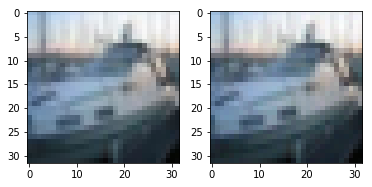

In [12]:
attack = OPT_attack_sign_SGD_lf(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed, svm=True)
plot_adv(x, adv_sign)

### Targeted

Targeted attack - Source: 8 and Target: 4 Seed: 100
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.4366
--------> Found distortion 0.3898
--------> Found distortion 0.3020


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.2781
--------> Found distortion 0.2603
--------> Found distortion 0.2519
==========> Found best distortion 0.2519 in 1.7404 seconds using 1190 queries
Iteration  10 distortion 0.118574 num_queries 7209
Iteration  20 distortion 0.086883 num_queries 9853
Iteration  30 distortion 0.074595 num_queries 12339
Iteration  40 distortion 0.066311 num_queries 14793
Iteration  50 distortion 0.062853 num_queries 17099
Iteration  60 distortion 0.060744 num_queries 19482
Iteration  70 distortion 0.059970 num_queries 21747
Iteration  80 distortion 0.057435 num_queries 24072
Iteration  90 distortion 0.056867 num_queries 26314
Iteration 100 distortion 0.056579 num_queries 28898
Iteration 110 distortion 0.056552 num_queries 31849
Iteration 120 distortion 0.056529 num_queries 34800
Iteration 130 distortion 0.056425 num_queries 38722
Iteration 140 distortion 0.056318 num_queries 42482
Iteration 150 distortion 0.056210 num_queries 46082
Iteration 160 distortion 0.056154 num_quer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Adversarial Example Found Successfully: distortion 0.0537 target 4 queries 81409 
Time: 123.2571 seconds


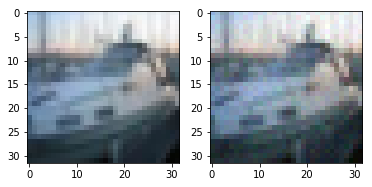

In [8]:
attack = OPT_attack_lf(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 8 and Target: 4 Seed: 100
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.4366
--------> Found distortion 0.3898
--------> Found distortion 0.3020


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.2781
--------> Found distortion 0.2603
--------> Found distortion 0.2519
==========> Found best distortion 0.2519 in 1.7364 seconds using 1190 queries
Iteration   1 distortion 0.188059 num_queries 1544
Iteration   6 distortion 0.101295 num_queries 3631
Iteration  11 distortion 0.077677 num_queries 4923
Iteration  16 distortion 0.069986 num_queries 6153
Iteration  21 distortion 0.063893 num_queries 7392
Iteration  26 distortion 0.058428 num_queries 8620
Iteration  31 distortion 0.057383 num_queries 9830
Iteration  36 distortion 0.055192 num_queries 11080
Iteration  41 distortion 0.052217 num_queries 12243
Iteration  46 distortion 0.049470 num_queries 13424
Iteration  51 distortion 0.048829 num_queries 14552
Iteration  56 distortion 0.048097 num_queries 15742
Iteration  61 distortion 0.047915 num_queries 16841
Iteration  66 distortion 0.047808 num_queries 17953
Iteration  71 distortion 0.047323 num_queries 19056
Iteration  76 distortion 0.046980 num_queries 2

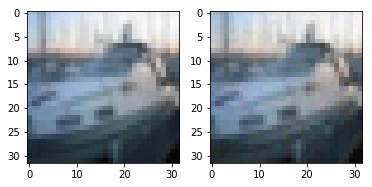

In [9]:
attack = OPT_attack_sign_SGD_lf(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 8 and Target: 4 Seed: 100
Searching for the initial direction on 100 samples: 
--------> Found distortion 0.4366
--------> Found distortion 0.3898
--------> Found distortion 0.3020


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


--------> Found distortion 0.2781
--------> Found distortion 0.2603
--------> Found distortion 0.2519
==========> Found best distortion 0.2519 in 1.7227 seconds using 1190 queries
Iteration   1 distortion 0.195440 num_queries 1474
Iteration   6 distortion 0.083065 num_queries 4313
Iteration  11 distortion 0.067118 num_queries 5709
Iteration  16 distortion 0.054205 num_queries 7057
Iteration  21 distortion 0.049908 num_queries 8361
Iteration  26 distortion 0.048560 num_queries 9541
Iteration  31 distortion 0.047851 num_queries 10724
Iteration  36 distortion 0.047616 num_queries 11837
Iteration  41 distortion 0.046639 num_queries 12976
Iteration  46 distortion 0.045889 num_queries 14138
Iteration  51 distortion 0.045283 num_queries 15275
Iteration  56 distortion 0.044756 num_queries 16453
Iteration  61 distortion 0.044580 num_queries 17552
Iteration  66 distortion 0.044333 num_queries 18691
Iteration  71 distortion 0.043334 num_queries 19810
Iteration  76 distortion 0.043209 num_queries 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Adversarial Example Found Successfully: distortion 0.0418 target 4 queries 33372 LS queries 7182 
Time: 54.8868 seconds


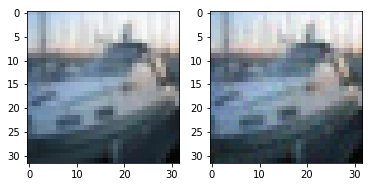

In [10]:
attack = OPT_attack_sign_SGD_lf(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed, svm=True)
plot_adv(x, adv)